In [1]:


import numpy as np
import matplotlib.pyplot as plt
import os
import json
import random



################# PARAMETERS TO CHANGE ####################
dataset_folder = '../dataset/sort_of_ARC/'
verbose = True



#total number of puzzles (meta samples)
dataset_size = 10

#number of training boards and testing boards
meta_trn_size = 5 #does nothing right now, defaults to papers implementation of (trn=5,tst=1)
meta_tst_size = 1
 

#look at figure 4 in the paper for understanding what this is
#seemingly they dont generate using all possible combinations
#although I am not 100% sure how they generate figure 4, talk to me (Jammy) to discuss further
#I think they basically use 'sparse_rule'

rule_matrix_style = 'sparse_rule'
#rule_matrix_style = 'uniform_rule'




In [2]:

from genDSL_helpers import visualize_board
from sort_of_arc_generation_script import generate_random_SortOfARC_puzzle



PUZZLE #1


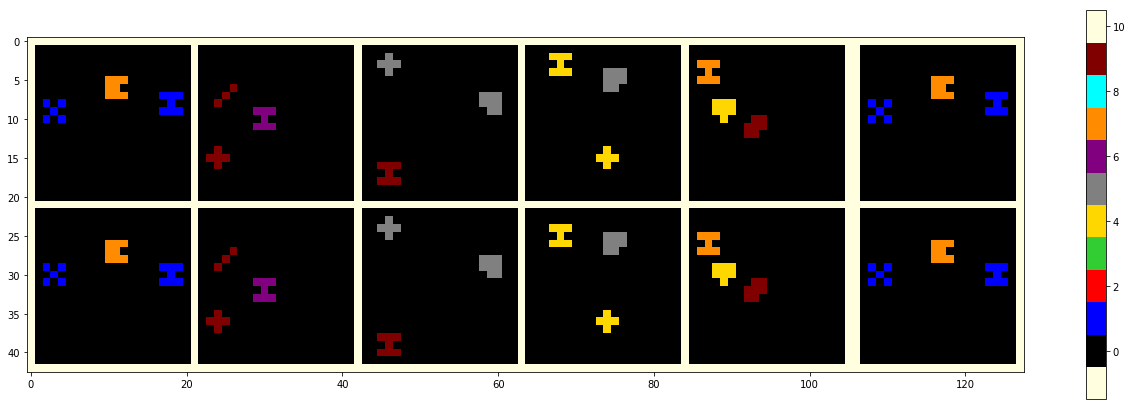



PUZZLE #2


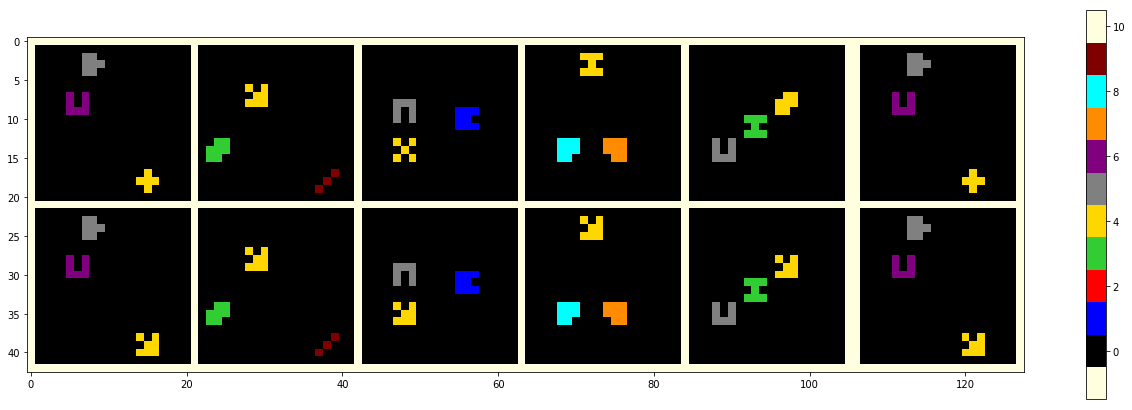



PUZZLE #3


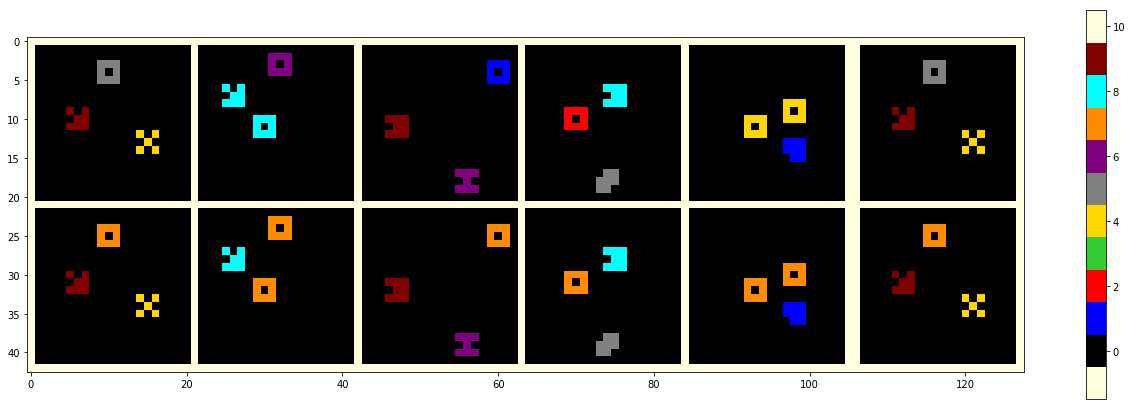



PUZZLE #4


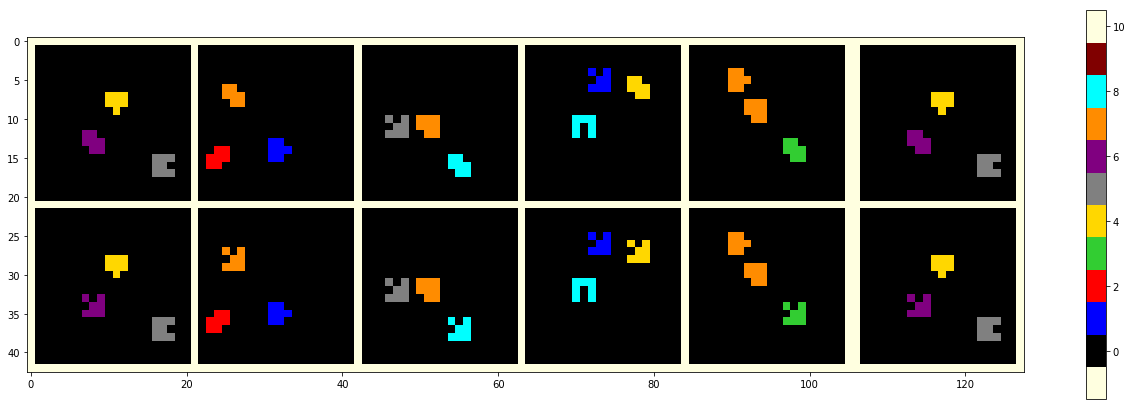



PUZZLE #5


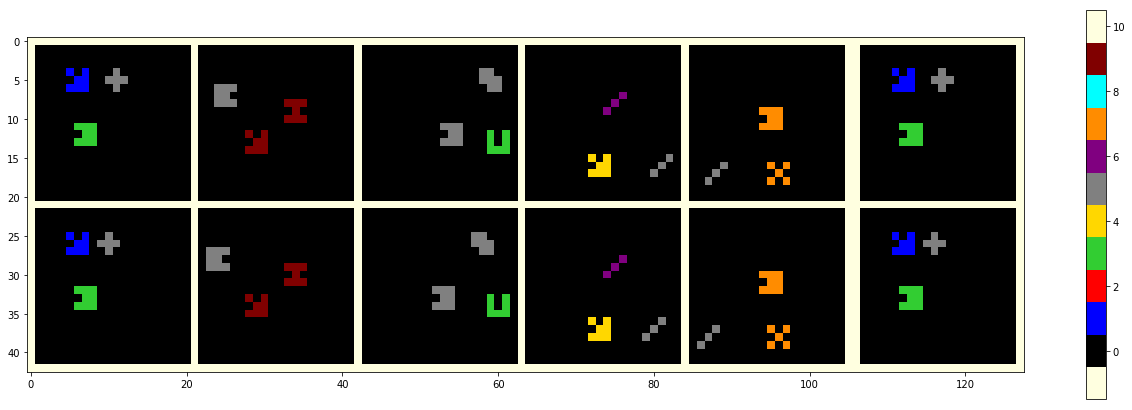



PUZZLE #6


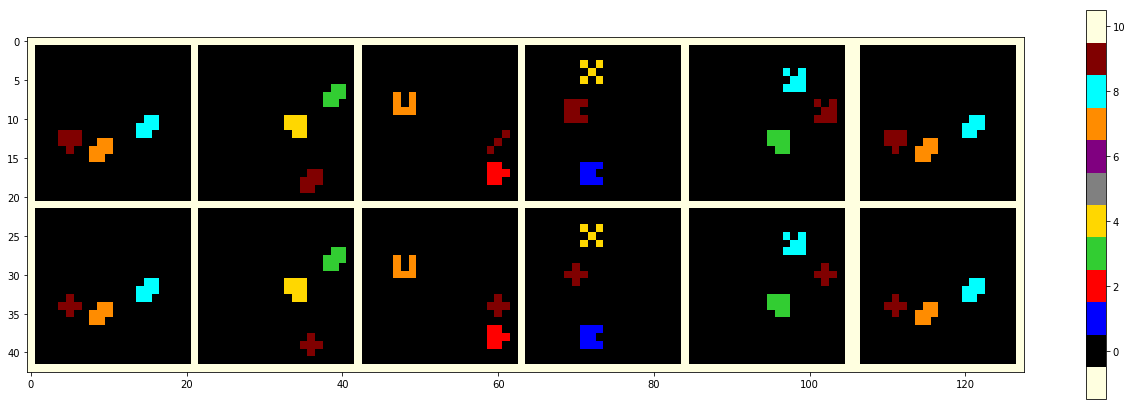



PUZZLE #7


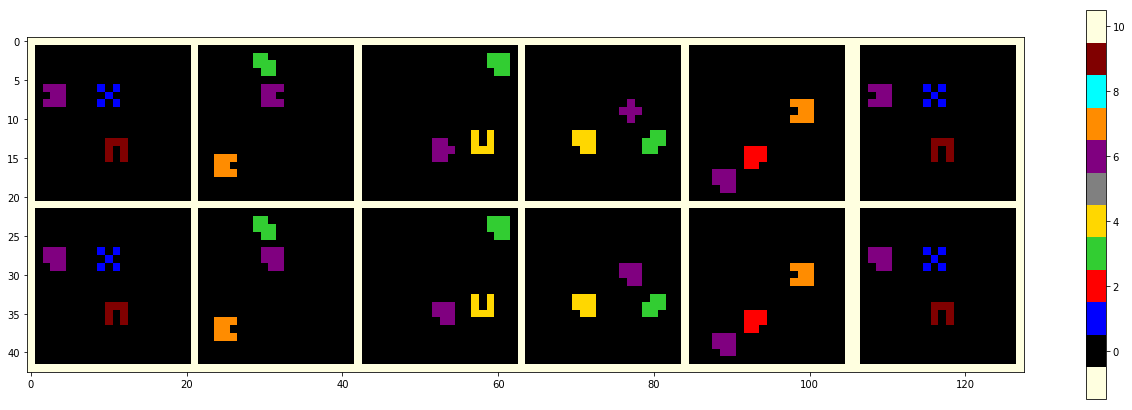



PUZZLE #8


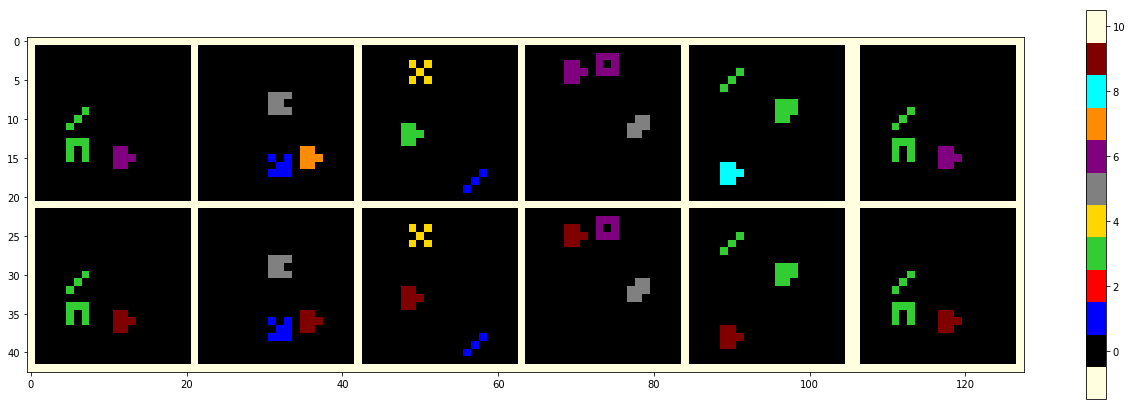



PUZZLE #9


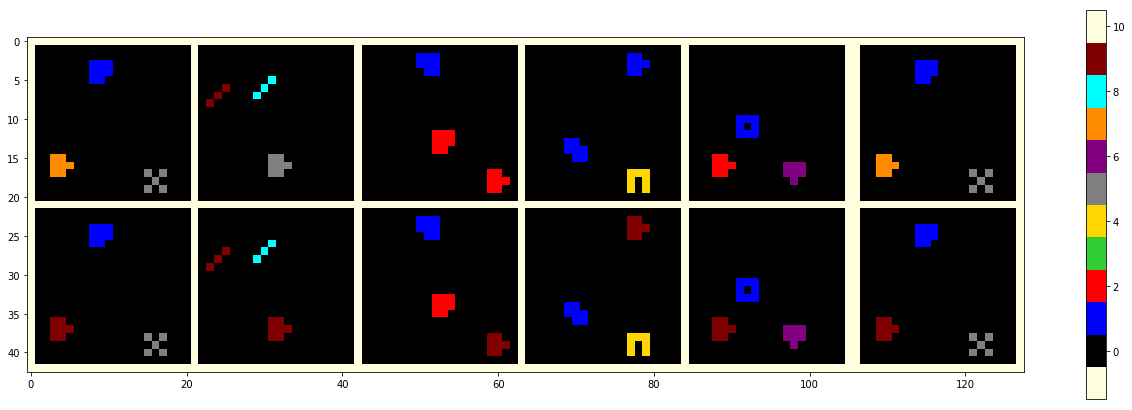



PUZZLE #10


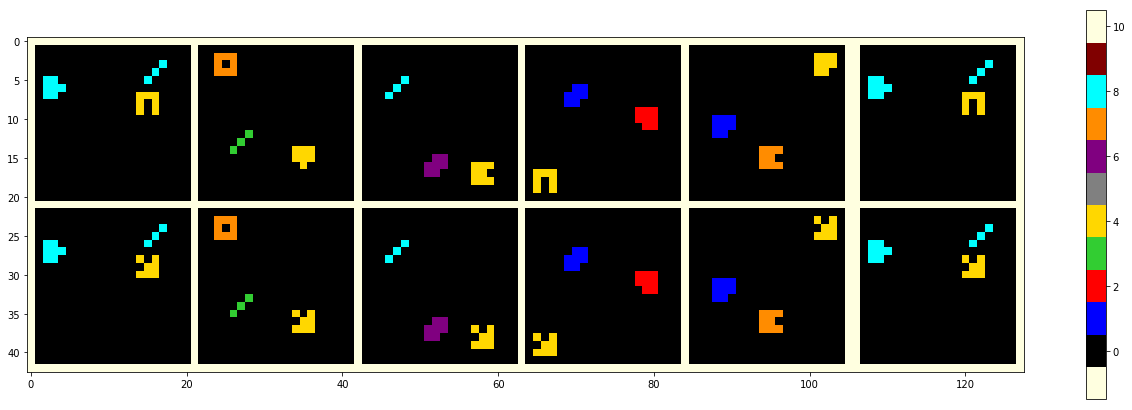



dataset generated


In [3]:
#adap

for n in range(dataset_size):
    if verbose:
        print("PUZZLE #"+str(n+1))
    
    meta_trn_boards,meta_tst_boards = generate_random_SortOfARC_puzzle(rule_matrix_style,verbose)
    
    

    json_obj = {}
    json_obj['train'] = []
    json_obj['test'] = []
    # train
    for i in range(meta_trn_boards.shape[0]):
        a = {
            'input': meta_trn_boards[i][0].tolist(),
            'output': meta_trn_boards[i][1].tolist()
        }
        json_obj['train'].append(a)

    a = {'input': meta_tst_boards[0][0].tolist(),
        'output': meta_tst_boards[0][1].tolist()    }
    json_obj['test'].append(a)


    # verify folder exists ./dungeon_dataset/
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)
    #make a new filename that is 8 characters long and represents a random hex number
    # characters betwee 0-9 and a-f
    string = '0123456789abcdef'
    filename = ''.join(random.choice(string) for i in range(8)) + '.json'
    # write the json object to a file
    with open(f"{dataset_folder}{filename}", 'w') as outfile:
        json.dump(json_obj, outfile)
    
    if verbose:
        print()
        print()

print('dataset generated')